## Iris Data Analysis

This experiment uses the iris dataset, which contains the sepal length, sepal width, and petal length of different species of iris flowers. The experiment calculates the mean and variance of each attribute for each species, and plots a three-dimensional scatter plot to observe the distribution of different species of iris flowers on these attributes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Print all the attributes of iris flowers
print(iris.feature_names)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Convert the iris dataset into a Pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add a column for species
df['target'] = iris.target

# Calculate the mean of each attribute for each species
means = df.groupby('target').mean()

# Calculate the variance of each attribute for each species
variances = df.groupby('target').var()

means_pivot = means.reset_index().pivot_table(index='target', values=iris.feature_names).T
variances_pivot = variances.reset_index().pivot_table(index='target', values=iris.feature_names).T

print('the mean of each species：\n', means_pivot)
print('the variance of each species：\n', variances_pivot)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
the mean of each species：
 target                0     1     2
petal length (cm) 1.462 4.260 5.552
petal width (cm)  0.246 1.326 2.026
sepal length (cm) 5.006 5.936 6.588
sepal width (cm)  3.428 2.770 2.974
the variance of each species：
 target                0     1     2
petal length (cm) 0.030 0.221 0.305
petal width (cm)  0.011 0.039 0.075
sepal length (cm) 0.124 0.266 0.404
sepal width (cm)  0.144 0.098 0.104


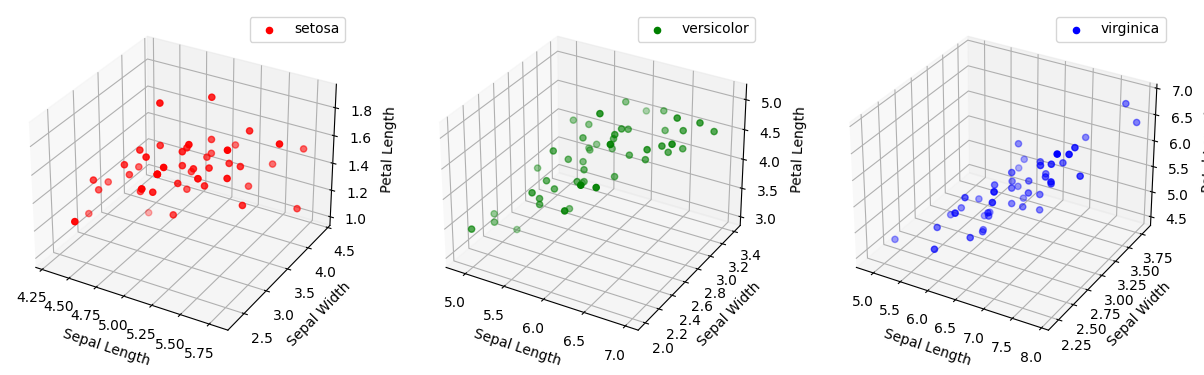

In [2]:
# Read the data
data = np.loadtxt('../data/iris.csv', delimiter=',', usecols=(0, 1, 2, 4), dtype={'names': ('sepal_length', 'sepal_width', 'petal_length', 'class'), 'formats': (float, float, float, '|S15')})

# Create three subplots
fig = plt.figure(figsize=(15, 20))

ax1 = fig.add_subplot(131, projection='3d')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')
ax1.set_zlabel('Petal Length')

ax2 = fig.add_subplot(132, projection='3d')
ax2.set_xlabel('Sepal Length')
ax2.set_ylabel('Sepal Width')
ax2.set_zlabel('Petal Length')

ax3 = fig.add_subplot(133, projection='3d')
ax3.set_xlabel('Sepal Length')
ax3.set_ylabel('Sepal Width')
ax3.set_zlabel('Petal Length')

# Group the data by species
setosa = data[data['class'] == b'setosa']
versicolor = data[data['class'] == b'versicolor']
virginica = data[data['class'] == b'virginica']

# Plot the data of different species of iris flowers on different subplots
ax1.scatter(setosa['sepal_length'], setosa['sepal_width'], setosa['petal_length'], c='r', label='setosa')
ax1.legend()

ax2.scatter(versicolor['sepal_length'], versicolor['sepal_width'], versicolor['petal_length'], c='g', label='versicolor')
ax2.legend()

ax3.scatter(virginica['sepal_length'], virginica['sepal_width'], virginica['petal_length'], c='b', label='virginica')
ax3.legend()

plt.show()